# Theory: Random Forest 🌲🌲🌲

Random Forest is a powerful ensemble learning technique that combines the strength of multiple decision trees to make robust predictions. It's like a forest of trees working together to provide more accurate and reliable results! 🌳🌳🌳

## Introduction to Random Forest 🌟

Random Forest is a type of ensemble learning algorithm. It gets its name from the idea that it's made up of a "forest" of decision trees. Each tree in the forest makes an individual prediction, and the final result is a combination of these predictions. The magic lies in their collaboration! 🤝

## How Random Forest Works 🌐

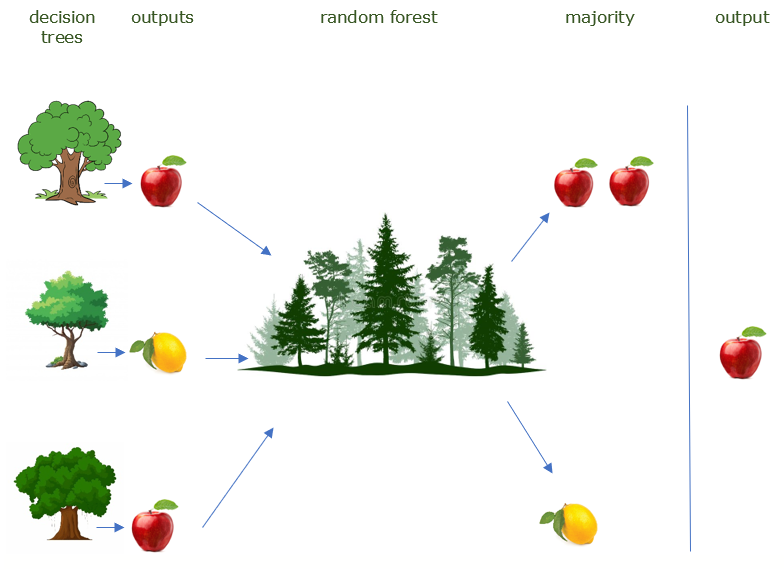

### Decision Tree Diversity 🌳🌲🌴

In a Random Forest:
- Multiple decision trees are trained on different subsets of the data (bootstrapped samples).
- Each tree may use a random subset of features for making decisions.

This diversity helps in reducing overfitting and improving the generalization of the model.

### Voting or Averaging 🗳️🧮

For classification tasks:
- Each tree "votes" for a class.
- The class that gets the most votes becomes the final prediction.

For regression tasks:
- Each tree makes a prediction.
- The final prediction is often the average (mean) of these individual predictions.

## Advantages of Random Forest 🚀

Random Forest has several advantages:
1. **High Accuracy**: It typically provides high accuracy because it combines multiple models.
2. **Reduced Overfitting**: The ensemble nature reduces overfitting compared to individual decision trees.
3. **Feature Importance**: It can measure feature importance, helping in feature selection.
4. **Robustness**: It handles outliers and noisy data well.

## Challenges and Considerations ⚠️

While Random Forest is a powerful tool, there are some considerations:
1. **Complexity**: The model can become complex with a large number of trees.
2. **Computation**: Training and evaluating a large Random Forest can be computationally intensive.
3. **Interpretability**: Interpreting feature importance in a large forest may not always be straightforward.

## Tips for Using Random Forest Effectively 💡

1. Choose an appropriate number of trees (`n_estimators`) based on your data and computational resources.
2. Experiment with other hyperparameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` to optimize performance.
3. Be mindful of feature selection and preprocessing to enhance model performance.

## Conclusion 🎉

Random Forest is a versatile and powerful ensemble learning method that can be used for both classification and regression tasks. It's a valuable tool in your machine learning toolbox, and understanding how it works can help you make better predictions and build more robust models! 🌲🌲🌲


## Importing Libraries

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Dataset
### Data Preprocessing
Data preprocessing is a crucial step in the machine learning pipeline. It involves cleaning and transforming the raw data to make it suitable for building machine learning models.

In [24]:
df = pd.read_csv('iris.csv') # Load the data
df.head() # Show the first five rows of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.columns = df.columns.str.lower() # Make the column names lowercase
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.describe().round() # Get summary statistics for the data

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.0,150.0,150.0,150.0,150.0
mean,76.0,6.0,3.0,4.0,1.0
std,43.0,1.0,0.0,2.0,1.0
min,1.0,4.0,2.0,1.0,0.0
25%,38.0,5.0,3.0,2.0,0.0
50%,76.0,6.0,3.0,4.0,1.0
75%,113.0,6.0,3.0,5.0,2.0
max,150.0,8.0,4.0,7.0,2.0


In [27]:
df.isnull().sum() # Check for missing values

id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [28]:
df.duplicated().sum() # Check for duplicate rows

0

In [29]:
df.corr(numeric_only=True) # Get the correlation matrix

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepallengthcm,0.716676,1.000000,-0.109369,0.871754,0.817954
sepalwidthcm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petallengthcm,0.882747,0.871754,-0.420516,1.000000,0.962757
petalwidthcm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [30]:
df.drop(['id'], axis=1, inplace=True) # Drop the id column as it is not needed

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a crucial step in any data science project. It refers to the process of exploring and analysing the dataset to summarize their main characteristics, often with visual methods. EDA is done to understand the data, discover patterns and anomalies, and check assumptions with the help of summary statistics and graphical representations.

### Bar Plot
Bar plot is used to show the distribution of a categorical variable in the form of rectangular bars. The height of the bars is proportional to the frequency of the variable.

<Axes: xlabel='species', ylabel='sepallengthcm'>

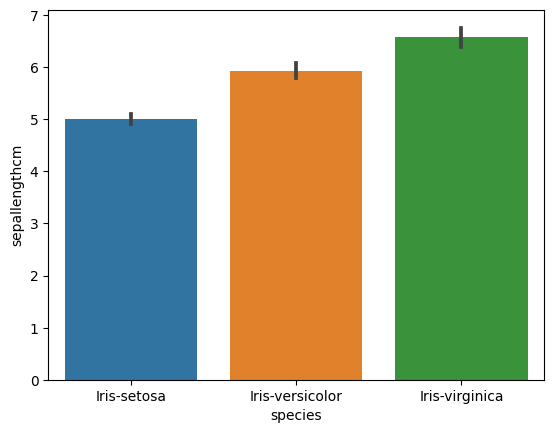

In [31]:
sns.barplot(x='species', y='sepallengthcm', data=df) # Plot the barplot for the species and sepal length

<Axes: xlabel='species', ylabel='sepalwidthcm'>

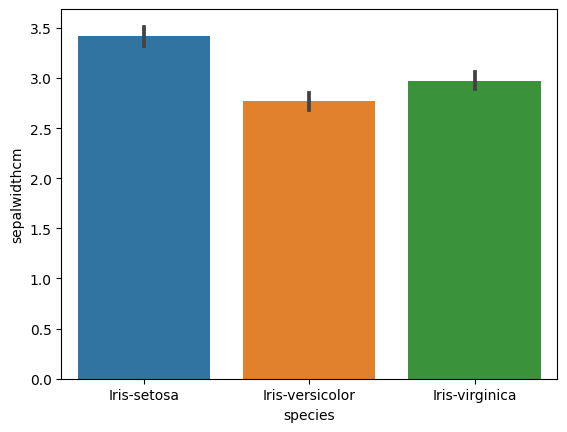

In [32]:
sns.barplot(x='species', y='sepalwidthcm', data=df) # Plot the barplot for the species and sepal width

<Axes: xlabel='species', ylabel='petallengthcm'>

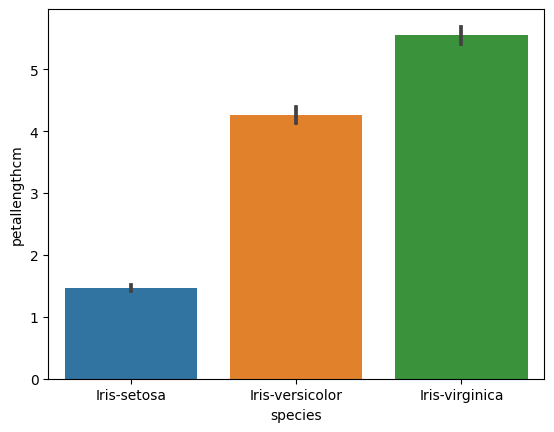

In [33]:
sns.barplot(x='species', y='petallengthcm', data=df) # Plot the barplot for the species and petal length

<Axes: xlabel='species', ylabel='petalwidthcm'>

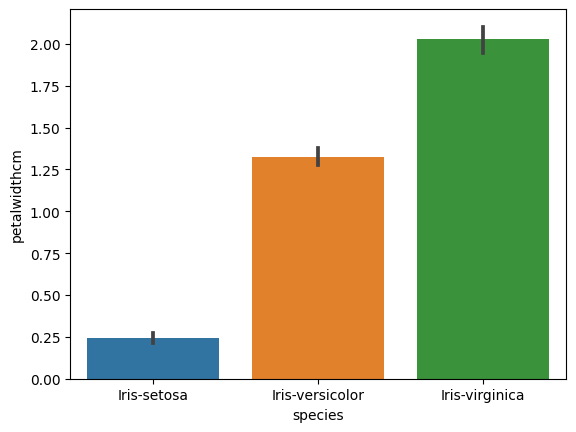

In [34]:
sns.barplot(x='species', y='petalwidthcm', data=df) # Plot the barplot for the species and petal length

### Heat Map
Heat map is used to find the correlation between different features in a dataset. The correlation coefficient is a statistical measure that reflects the correlation between two variables. It ranges from -1 to +1. If the value is close to +1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

<Axes: >

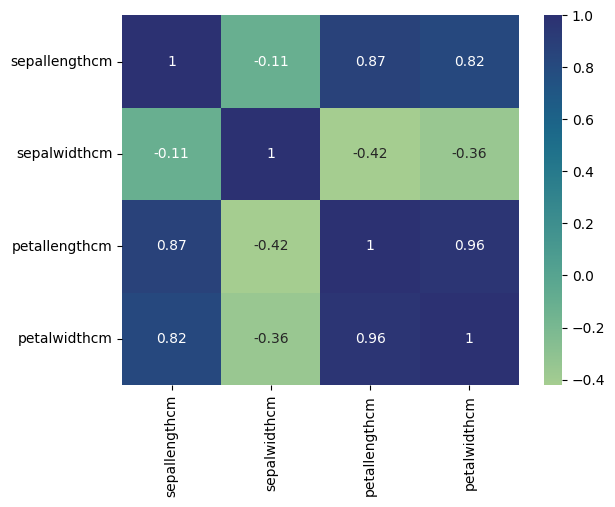

In [35]:
sns.heatmap(df.corr(numeric_only=True), cmap='crest', annot=True) # Plot the heatmap for the correlation matrix

### Pair Plot
Pair plot is used to visualize the relationship between different features in a dataset. It plots pairwise relationships in a dataset.

c:\Users\EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


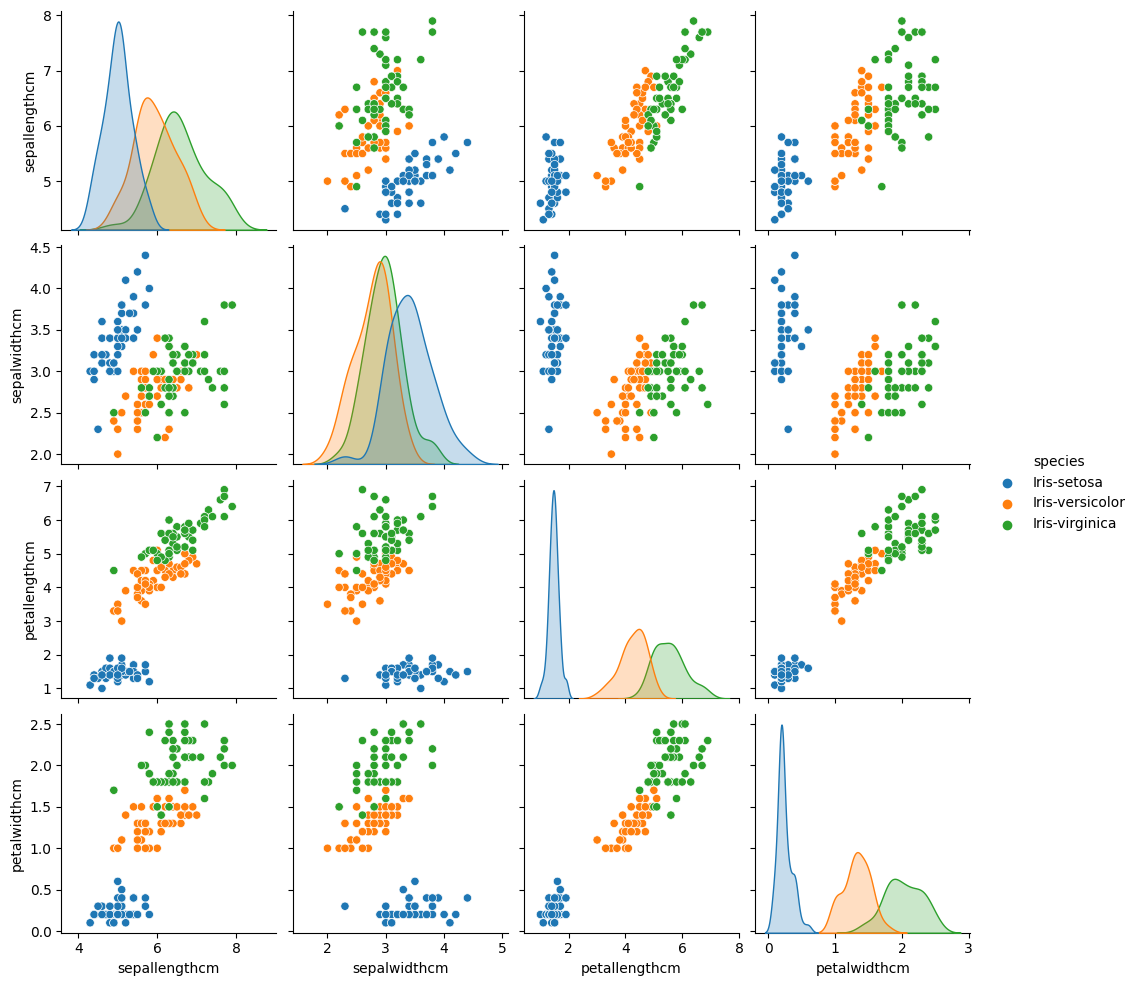

In [36]:
sns.pairplot(df, hue = 'species') # Plot the pairplot for the data

## Data Splitting
Data splitting is done to divide the dataset into training and testing sets. The training set is used to train the model and the testing set is used to evaluate the model.

In [37]:
x = df.drop(['species'], axis=1) # Get the features
y = df['species'] # Get the target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

In [38]:
len(x_train), len(x_test), len(y_train), len(y_test) # Check the length of the training and testing sets

(120, 30, 120, 30)

## Random Forest
Random forest is an ensemble learning technique that combines multiple decision trees to make a more accurate prediction. It is a supervised learning algorithm that can be used for both classification and regression tasks.

In [39]:
rf = RandomForestClassifier(n_estimators=10) # Create the random forest classifier
rf.fit(x_train, y_train) # Fit the model to the training data

RandomForestClassifier(n_estimators=10)

In [40]:
prediction = rf.predict(x_test) # Make predictions on the testing data
print("The accuracy of the Random Forest is: ", metrics.accuracy_score(prediction, y_test)*100, "%") # Print the accuracy of the model

The accuracy of the Random Forest is:  100.0 %
